In [1]:
from collections import Counter

import numpy as np
from imblearn.over_sampling import SMOTE
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_crossover, get_mutation, get_sampling
from sklearn.tree import DecisionTreeClassifier

from datasets import load
from jfots import JFOTS

In [2]:
X, y = load("pima")[0][0]
Counter(y)

Counter({0.0: 250, 1.0: 134})

In [3]:
X.shape

(384, 8)

In [4]:
estimator = DecisionTreeClassifier()
oversampler_class = SMOTE
oversampler_kwargs = {"k_neighbors": 1}
optimizer_class = NSGA2
optimizer_kwargs = {
    "pop_size": 200,
    "sampling": get_sampling("bin_random"),
    "crossover": get_crossover("bin_two_point"),
    "mutation": get_mutation("bin_bitflip"),
    "eliminate_duplicates": True,
}

In [5]:
jfots = JFOTS(
    estimator=estimator,
    oversampler_class=oversampler_class,
    oversampler_kwargs=oversampler_kwargs,
    optimizer_class=optimizer_class,
    optimizer_kwargs=optimizer_kwargs,
    termination=('n_gen', 500),
    random_state=0,
    verbose=False,
)
jfots.fit_resample(X, y)

In [6]:
jfots.type_counts  # how many minority observations from different types are in the original dataset

{<ObservationType.SAFE: 0>: 34,
 <ObservationType.BORDERLINE: 1>: 66,
 <ObservationType.RARE: 2>: 22,
 <ObservationType.OUTLIER: 3>: 12}

In [7]:
len(jfots.solutions)  # how many solutions are on the pareto front

9

In [8]:
solution = np.random.choice(jfots.solutions)
X_, y_ = solution.data
Counter(y_)

Counter({0.0: 250, 1.0: 250})

In [9]:
X_.shape

(500, 6)

In [10]:
solution.used_types  # which minority observation types were used in the chosen solution

{<ObservationType.SAFE: 0>: True,
 <ObservationType.BORDERLINE: 1>: True,
 <ObservationType.RARE: 2>: True,
 <ObservationType.OUTLIER: 3>: True}

In [11]:
solution.feature_mask  # which features were used in the chosen solution

array([ True,  True,  True,  True, False,  True, False,  True])

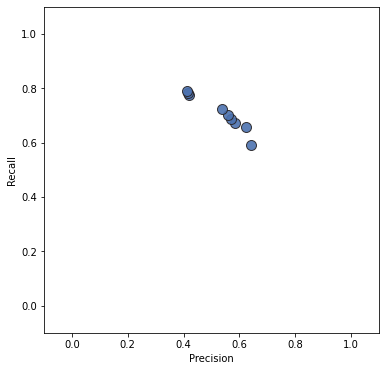

In [12]:
jfots.plot_pareto()

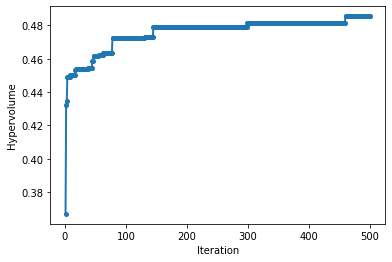

In [13]:
jfots.plot_hv()